In [1]:
import imageio
import matplotlib
matplotlib.use('Agg')
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np
from   PIL import Image, ImageDraw, ImageFont
from   PIL.ImageChops import add, difference, multiply, screen, subtract
import PIL.ImageStat as stat
from   scipy import misc
from   scipy.ndimage import affine_transform, zoom
from   skimage import color, data, exposure, img_as_float, viewer
from   skimage.io import (
    imread, imread_collection, imsave, imshow, imshow_collection, show)
from   skimage.transform import SimilarityTransform, swirl, warp
from   skimage.util import invert, montage, random_noise

%matplotlib inline

In [2]:
!ls ../../../images

hill.png               parrot.png             pepper.jpg
hill_dark.png          parrot_desaturated.png
lena_small.jpg         parrot_grey.png


In [3]:
IMG_DIR = '../../../images'

453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


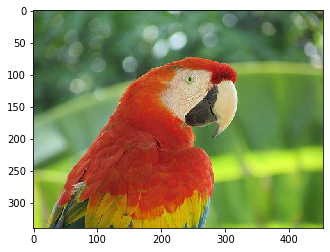

In [4]:
im = Image.open(f'{IMG_DIR}/parrot.png')
print(im.width, im.height, im.mode, im.format, type(im))
plt.imshow(im);

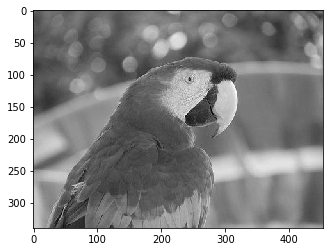

In [5]:
im_g = im.convert('L') # greyscale
im_g.save(f'{IMG_DIR}/parrot_grey.png')
plt.imshow(im_g, cmap='gray');

In [6]:
im = mpimg.imread(f'{IMG_DIR}/hill.png') # np ndarray
print(im.shape, im.dtype, type(im))

(960, 1280, 4) float32 <class 'numpy.ndarray'>


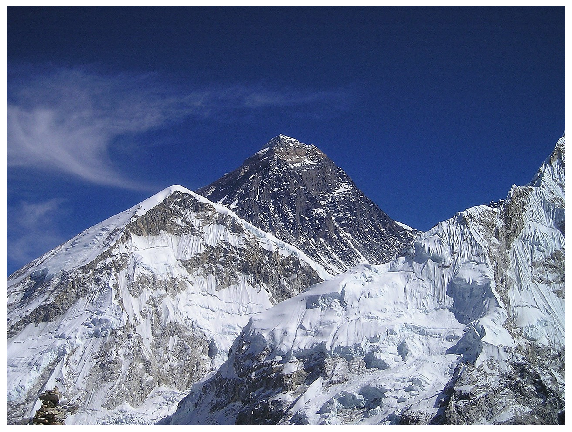

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.axis('off');

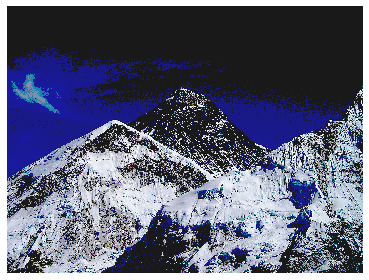

In [8]:
im1 = im.copy()
im1[im1 < 0.5] = 0.1 # darken
plt.imshow(im1)
plt.axis('off')
plt.tight_layout();
plt.savefig(f'{IMG_DIR}/hill_dark.png')

# matplotlib

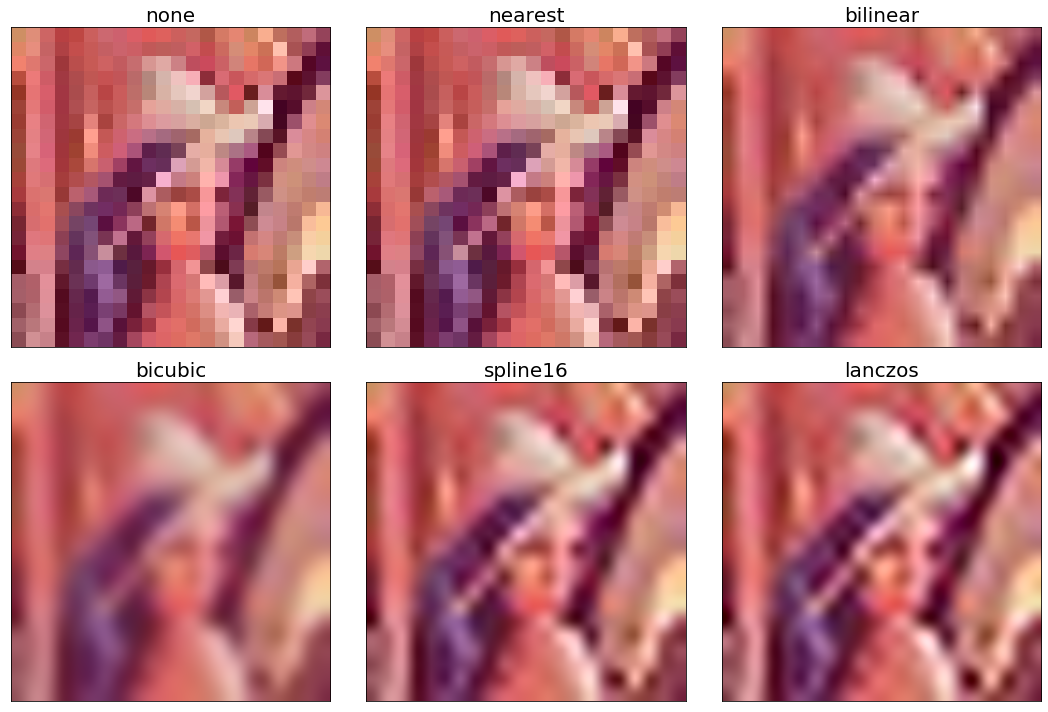

In [9]:
im = mpimg.imread(f'{IMG_DIR}/lena_small.jpg')
interpolation_methods = [
    'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']

fig, axes = plt.subplots(nrows=2, 
                         ncols=3, 
                         figsize=(15, 10), 
                         subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, method in zip(axes.flat, interpolation_methods):
    ax.imshow(im, interpolation=method)
    ax.set_title(method, size=20)
plt.tight_layout();

# sk-image

In [10]:
im = imread(f'{IMG_DIR}/parrot.png')
print(im.shape, im.dtype, type(im))

(340, 453, 3) uint8 <class 'imageio.core.util.Array'>


/opt/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:271: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


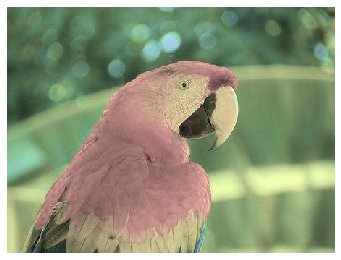

In [11]:
hsv = color.rgb2hsv(im)
hsv[:, :, 1] = 0.3 # change saturation
im1 = color.hsv2rgb(hsv)
imshow(im1)
plt.axis('off');
imsave(f'{IMG_DIR}/parrot_desaturated.png', im1)

In [12]:
viewer = viewer.ImageViewer(im)
viewer.show();

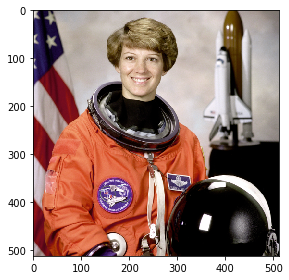

In [13]:
im = data.astronaut()
imshow(im);

# `scipy.misc`

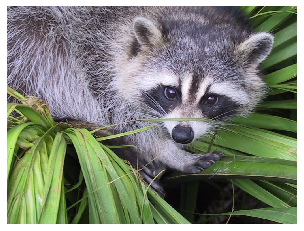

In [17]:
im = misc.face()
imageio.imsave(f'{IMG_DIR}/face.png', im) # uses PIL
plt.imshow(im)
plt.axis('off');

In [15]:
im = imageio.imread(f'{IMG_DIR}/pepper.jpg')
type(im), im.shape, im.dtype

(imageio.core.util.Array, (225, 225, 3), dtype('uint8'))

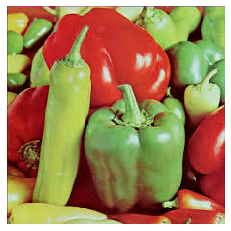

In [16]:
plt.imshow(im)
plt.axis('off');

# Convert between file types

In [18]:
im = Image.open(f'{IMG_DIR}/parrot.png')
print(im.mode)

RGB


In [19]:
#im.save(f'{IMG_DIR}/parrot.jpg')
im = Image.open(f'{IMG_DIR}/hill.png')
print(im.mode)

RGBA
